In [2]:
import sqlite3
import matplotlib.pyplot as plt

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')
cursor = conn.cursor()

In [4]:
# Define the performance metric to analyze (e.g., 'TotalPoints', 'GoalsScored', 'GoalsConceded')
performance_metric = 'TotalPoints'
# Execute an SQL query to retrieve relevant data for all matches and venues
cursor.execute('''
SELECT
    HomeTeam AS Team,
    SUM(CASE WHEN FTR = 'H' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS PointsHome,
    SUM(FTHG) AS GoalsScoredHome,
    SUM(FTAG) AS GoalsConcededHome
FROM
    matchs
GROUP BY
    Team
ORDER BY
    Team
''')

# Fetch the results for matches played at home
home_results = cursor.fetchall()

# Execute another SQL query to retrieve relevant data for all matches and venues
cursor.execute('''
SELECT
    AwayTeam AS Team,
    SUM(CASE WHEN FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS PointsAway,
    SUM(FTAG) AS GoalsScoredAway,
    SUM(FTHG) AS GoalsConcededAway
FROM
    matchs
GROUP BY
    Team
ORDER BY
    Team
''')

# Fetch the results for matches played away
away_results = cursor.fetchall()

In [5]:
# Create dictionaries to store home and away performance metrics for each team
home_performance = {row[0]: (row[1], row[2], row[3]) for row in home_results}
away_performance = {row[0]: (row[1], row[2], row[3]) for row in away_results}

# Calculate home advantage metrics for each team
home_advantage = {}
for team in home_performance:
    if team in away_performance:
        home_points, home_goals_scored, home_goals_conceded = home_performance[team]
        away_points, away_goals_scored, away_goals_conceded = away_performance[team]

        if performance_metric == 'TotalPoints':
            home_advantage[team] = home_points - away_points
        elif performance_metric == 'GoalsScored':
            home_advantage[team] = home_goals_scored - away_goals_scored
        elif performance_metric == 'GoalsConceded':
            home_advantage[team] = away_goals_conceded - home_goals_conceded

# Sort teams by home advantage
sorted_teams = sorted(home_advantage.items(), key=lambda x: x[1], reverse=True)

# Display teams with the strongest home advantage
print(f"Teams with the strongest home advantage in terms of {performance_metric}:")
for team, advantage in sorted_teams[:10]:  # Display the top 10 teams
    print(f"{team}: Home Advantage = {advantage}")

Teams with the strongest home advantage in terms of TotalPoints:
Numancia: Home Advantage = 257
Sevilla: Home Advantage = 241
Almeria: Home Advantage = 239
Mallorca: Home Advantage = 238
Las Palmas: Home Advantage = 233
Tenerife: Home Advantage = 225
Gillingham: Home Advantage = 220
Sp Gijon: Home Advantage = 215
Levante: Home Advantage = 212
PAOK: Home Advantage = 211


In [6]:
# Execute an SQL query to retrieve relevant data for all seasons and venues
cursor.execute('''
SELECT
    season,
    HomeTeam AS Team,
    SUM(CASE WHEN FTR = 'H' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS PointsHome
FROM
    matchs
GROUP BY
    season, Team
ORDER BY
    season, Team
''')

# Fetch the results for matches played at home
home_results = cursor.fetchall()

# Execute another SQL query to retrieve relevant data for all seasons and venues
cursor.execute('''
SELECT
    season,
    AwayTeam AS Team,
    SUM(CASE WHEN FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS PointsAway
FROM
    matchs
GROUP BY
    season, Team
ORDER BY
    season, Team
''')

# Fetch the results for matches played away
away_results = cursor.fetchall()

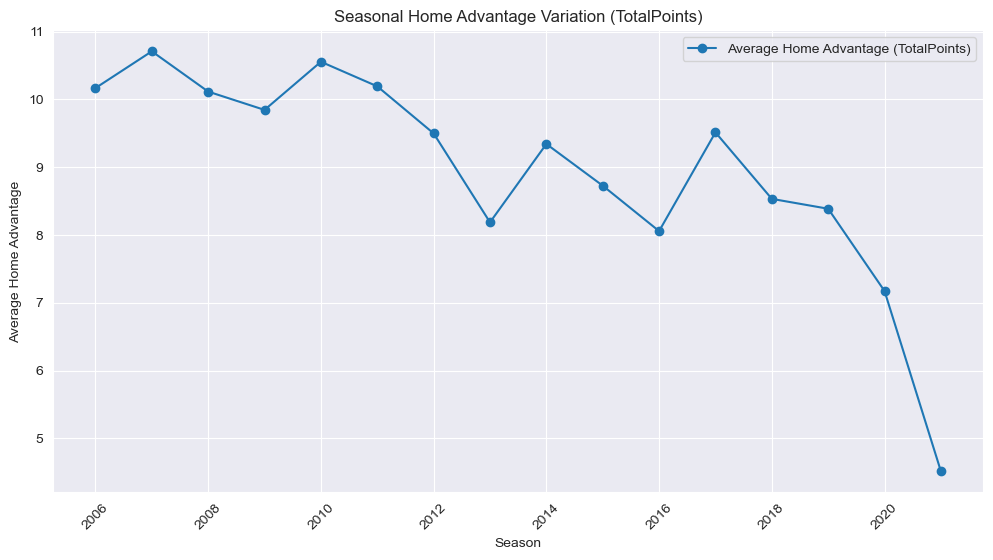

In [7]:
# Create dictionaries to store home and away performance metrics for each team by season
home_performance = {(row[0], row[1]): row[2] for row in home_results}
away_performance = {(row[0], row[1]): row[2] for row in away_results}

# Calculate seasonal home advantage metrics for each team
seasonal_home_advantage = {}
for season, team in home_performance:
    if (season, team) in away_performance:
        home_points = home_performance[(season, team)]
        away_points = away_performance[(season, team)]

        if performance_metric == 'TotalPoints':
            seasonal_home_advantage[(season, team)] = home_points - away_points

# Analyze and visualize seasonal home advantage
import matplotlib.pyplot as plt

# Extract unique seasons for analysis
unique_seasons = sorted(set(season for season, _ in seasonal_home_advantage.keys()))

# Calculate average home advantage per season
average_home_advantage = []
for season in unique_seasons:
    season_home_advantages = [advantage for (s, _), advantage in seasonal_home_advantage.items() if s == season]
    average_home_advantage.append(sum(season_home_advantages) / len(season_home_advantages))

# Create a line chart to visualize seasonal home advantage
plt.figure(figsize=(12, 6))
plt.plot(unique_seasons, average_home_advantage, marker='o', linestyle='-', label=f'Average Home Advantage ({performance_metric})')
plt.xlabel('Season')
plt.ylabel('Average Home Advantage')
plt.title(f'Seasonal Home Advantage Variation ({performance_metric})')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Close the database connection
conn.close()